In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

In [ ]:
data = pd.read_csv("Pizza_data.csv")
data.head(5)

In [ ]:
data.dtypes

In [ ]:
data.isna().sum()

Changing column names without space or with '_'

In [ ]:
data1 = data.rename(columns={"menus.amountMax": "menus_amountMax", "menus.amountMin": "menus_amountMin", 
                     "menus.currency": "menus_currency", "menus.name": "menus_name"})

In [ ]:
#data1.columns = data1.columns.str.replace('.', '_')

In [2]:
print(data1["menus_currency"].nunique())
print(data1["priceRangeCurrency"].nunique())
print(data1["country"].nunique())

NameError: name 'data1' is not defined

Removing Unnecessary Columns

In [4]:
data2 = data1.drop(["dateAdded","keys","menuPageURL","country",
                    "menus_currency", "priceRangeCurrency","priceRangeMin", "priceRangeMax"], axis=1)

Finding missing values rows

In [44]:
data2[data2.isna().any(axis=1)]

,id,dateUpdated,address,categories,primaryCategories,city,latitude,longitude,menus_amountMax,menus_amountMin,menus_name,name,postalCode,province
8733,AVwdpGJ5_7pvs4fz75fR,2018-03-11T21:01:36Z,1000 Cooper St,"Pizza Place,Restaurants",Accommodation & Food Services,Woodbury,39.828326,-75.12422,20.99,20.99,Add to Large Pizzas,Papa John's Pizza,NaN,NJ
8734,AVwdpGJ5_7pvs4fz75fR,2018-03-11T21:01:36Z,1000 Cooper St,"Pizza Place,Restaurants",Accommodation & Food Services,Woodbury,39.828326,-75.12422,20.99,20.99,Add To Large Pizzas,Papa John's Pizza,NaN,NJ
8735,AVwdpGJ5_7pvs4fz75fR,2018-03-11T21:01:36Z,1000 Cooper St,"Pizza Place,Restaurants",Accommodation & Food Services,Woodbury,39.828326,-75.12422,21.00,21.00,Medium Pizza Offers,Papa John's Pizza,NaN,NJ
8736,AVwdpGJ5_7pvs4fz75fR,2018-03-11T21:01:36Z,1000 Cooper St,"Pizza Place,Restaurants",Accommodation & Food Services,Woodbury,39.828326,-75.12422,12.00,12.00,Any Large Pizza,Papa John's Pizza,NaN,NJ


Checking out missing value and trying to find out to replace it with relative attibute

In [45]:
print (data2[data2['address'] == '1000 Cooper St'])

                        id           dateUpdated         address  \
8733  AVwdpGJ5_7pvs4fz75fR  2018-03-11T21:01:36Z  1000 Cooper St   
8734  AVwdpGJ5_7pvs4fz75fR  2018-03-11T21:01:36Z  1000 Cooper St   
8735  AVwdpGJ5_7pvs4fz75fR  2018-03-11T21:01:36Z  1000 Cooper St   
8736  AVwdpGJ5_7pvs4fz75fR  2018-03-11T21:01:36Z  1000 Cooper St   

                   categories              primaryCategories      city  \
8733  Pizza Place,Restaurants  Accommodation & Food Services  Woodbury   
8734  Pizza Place,Restaurants  Accommodation & Food Services  Woodbury   
8735  Pizza Place,Restaurants  Accommodation & Food Services  Woodbury   
8736  Pizza Place,Restaurants  Accommodation & Food Services  Woodbury   

       latitude  longitude  menus_amountMax  menus_amountMin  \
8733  39.828326  -75.12422            20.99            20.99   
8734  39.828326  -75.12422            20.99            20.99   
8735  39.828326  -75.12422            21.00            21.00   
8736  39.828326  -75.12422      

In [46]:
print (data2[data2['city'] == 'Woodbury'])

                        id           dateUpdated             address  \
1230  AVzA38hd-gnIPe8DSeDV  2019-04-12T13:41:05Z  141B Woodbury Road   
1231  AVzA38hd-gnIPe8DSeDV  2019-04-12T13:41:05Z  141B Woodbury Road   
1232  AVzA38hd-gnIPe8DSeDV  2019-04-12T13:41:05Z  141B Woodbury Road   
1233  AVzA38hd-gnIPe8DSeDV  2019-04-12T13:41:05Z  141B Woodbury Road   
8733  AVwdpGJ5_7pvs4fz75fR  2018-03-11T21:01:36Z      1000 Cooper St   
8734  AVwdpGJ5_7pvs4fz75fR  2018-03-11T21:01:36Z      1000 Cooper St   
8735  AVwdpGJ5_7pvs4fz75fR  2018-03-11T21:01:36Z      1000 Cooper St   
8736  AVwdpGJ5_7pvs4fz75fR  2018-03-11T21:01:36Z      1000 Cooper St   

                   categories              primaryCategories      city  \
1230              Pizza Place  Accommodation & Food Services  Woodbury   
1231              Pizza Place  Accommodation & Food Services  Woodbury   
1232              Pizza Place  Accommodation & Food Services  Woodbury   
1233              Pizza Place  Accommodation & Food Ser

Here we found postal code of Woodbury city but it's in different State. 

So I'm going to impute this using internet.

In [73]:
data2.postalCode = data2.postalCode.fillna(value= '08096')

In [74]:
data2.isnull().sum()

id                   0
dateUpdated          0
address              0
categories           0
primaryCategories    0
city                 0
latitude             0
longitude            0
menus_amountMax      0
menus_amountMin      0
menus_name           0
name                 0
postalCode           0
province             0
dtype: int64

In [49]:
data2["id"].nunique()

2285

Changing date format

In [6]:
data2['dateUpdated'] = pd.to_datetime(data2['dateUpdated'], format='%Y-%m-%dT%H:%M:%SZ')
data2['dateUpdated'] = data2['dateUpdated'].dt.date
data2['dateUpdated'] = pd.to_datetime(data2['dateUpdated'], errors='coerce')
data2.head()

,id,dateUpdated,address,categories,primaryCategories,city,latitude,longitude,menus_amountMax,menus_amountMin,menus_name,name,postalCode,province
0,AVz3Y-7h3D1zeR_xDAqm,2019-05-01,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,34.832300,-92.183800,7.98,7.98,Cheese Pizza,Shotgun Dans Pizza,72120,AR
1,AVweGPFF_7pvs4fzAAzQ,2019-05-01,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,33.509266,-112.073044,6.00,6.00,Pizza Cookie,Sauce Pizza Wine,85012,AZ
2,AVwdRGa9_7pvs4fz4E3K,2019-05-01,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,39.144883,-84.432685,6.49,6.49,Pizza Blanca,Mios Pizzeria,45209,OH
3,AVwdX4psIN2L1WUfvJB1,2019-05-01,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,42.516669,-83.106630,5.99,5.99,Small Pizza,Hungry Howies Pizza,48071,MI
4,AVwdaeTtkufWRAb55pSH,2019-05-01,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,39.286630,-76.566984,5.49,5.49,Pizza Sub,Spartan Pizzeria,21224,MD


In [15]:
data2.dtypes

id                           object
dateUpdated          datetime64[ns]
address                      object
categories                   object
primaryCategories            object
city                         object
latitude                    float64
longitude                   float64
menus_amountMax             float64
menus_amountMin             float64
menus_name                   object
name                         object
postalCode                   object
province                     object
dtype: object

In [16]:
data2.nunique()

id                   2285
dateUpdated           209
address              2278
categories            456
primaryCategories       8
city                 1028
latitude             2284
longitude            2284
menus_amountMax       773
menus_amountMin       762
menus_name           4749
name                 1827
postalCode           1772
province               44
dtype: int64

In [17]:
data2.describe()

,latitude,longitude,menus_amountMax,menus_amountMin
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.371895,-90.063800,14.032670,13.416902
std,4.573537,17.340379,17.607233,10.742678
min,21.421326,-157.802443,0.000000,0.000000
25%,34.422946,-104.801126,8.490000,8.000000
50%,40.118880,-82.909949,13.390000,12.990000
75%,40.905048,-75.194741,17.950000,16.990000
max,64.850500,-71.946170,1395.000000,243.000000


Finding Top selling Pizza Brands to take a Branch

In [18]:
# Top Selling Pizza Brands Amount, Share Percentage and Frequency
data_name = data2.groupby(data2['name'])[['menus_amountMin']].sum().reset_index().sort_values('menus_amountMin',ascending = False).head(30)
data_name['Percentage'] = 100 * data_name['menus_amountMin']  / data_name['menus_amountMin'].sum()
data_name['Freq'] = data2.groupby('name')['name'].transform('count')
data_name

,name,menus_amountMin,Percentage,Freq
257,California Pizza Kitchen,7251.66,23.751280,40
1162,Papa Murphy's,2855.17,9.351506,10
1158,Papa John's Pizza,1974.40,6.466730,6
1243,Pirates Pizza,1064.45,3.486381,12
1113,Olympia Pizza and Spaghetti House,989.40,3.240571,8
1071,New York Pizza Suprema,987.91,3.235690,13
590,Gino's Pizzeria,949.65,3.110378,6
1159,Papa Johns Pizza,948.76,3.107463,6
1165,Papa Murphys,906.91,2.970392,10
858,Little Italy Gourmet Pizza,817.20,2.676566,22


In [19]:
data_name = data2.groupby(data2['name'])[['menus_amountMax']].sum().reset_index().sort_values('menus_amountMax',ascending = False).head(30)
data_name['Percentage'] = 100 * data_name['menus_amountMax']  / data_name['menus_amountMax'].sum()
data_name['Freq'] = data2.groupby('name')['name'].transform('count')
data_name

,name,menus_amountMax,Percentage,Freq
257,California Pizza Kitchen,7251.66,22.941409,40
1162,Papa Murphy's,2855.17,9.032638,10
1158,Papa John's Pizza,1974.40,6.246227,6
1420,Rocco's,1448.81,4.583467,1
1243,Pirates Pizza,1064.45,3.367502,12
1113,Olympia Pizza and Spaghetti House,989.40,3.130074,8
1071,New York Pizza Suprema,987.91,3.125360,13
590,Gino's Pizzeria,949.65,3.004320,6
1159,Papa Johns Pizza,948.76,3.001505,6
1165,Papa Murphys,906.91,2.869108,10


In [20]:
data_name = data2.groupby(data2['name'])[['menus_amountMin']].sum().reset_index().sort_values('menus_amountMin',ascending = False).tail(30)
data_name['Freq'] = data2.groupby('name')['name'].transform('count')
data_name

,name,menus_amountMin,Freq
303,Celestino's New York Pizza,2.00,3
1190,Pat's Pizza Family Restaurant (Pat'sPFR),2.00,4
580,Gigios Pizzeria,2.00,1
1580,Spartan Pizza,2.00,8
1064,Naty's Pizza,2.00,3
115,Backstreet,2.00,69
1486,Saint Pizza Lounge,2.00,17
1462,Rosselli's Pizza,2.00,8
1052,NYC Pizza Cafe,2.00,2
1042,Mulberry Street,2.00,15


Finding Top selling pizaas

In [21]:
data_Mname = data2.groupby(data2['menus_name'])[['menus_amountMin']].sum().reset_index().sort_values('menus_amountMin',ascending = False).head(30)
data_Mname['Percentage'] = 100 * data_Mname['menus_amountMin']  / data_Mname['menus_amountMin'].sum()
data_Mname

,menus_name,menus_amountMin,Percentage
1106,Cheese Pizza,3059.90,10.563681
4628,White Pizza,3033.08,10.471090
1943,Hawaiian Pizza,2077.71,7.172870
960,Buffalo Chicken Pizza,1666.50,5.753251
2416,Margherita Pizza,1502.79,5.188076
3052,Pizza,1432.43,4.945172
4565,Veggie Pizza,1418.67,4.897669
3769,Sicilian Pizza,1154.68,3.986297
814,Bbq Chicken Pizza,1112.87,3.841957
4188,Taco Pizza,963.96,3.327875


Cheese Pizza             299
White Pizza              225
Hawaiian Pizza           149
Buffalo Chicken Pizza    112
Pizza                    111
Margherita Pizza         104
Veggie Pizza              95
Bbq Chicken Pizza         81
Greek Pizza               72
Pizza Sub                 71
Name: menus_name, dtype: int64


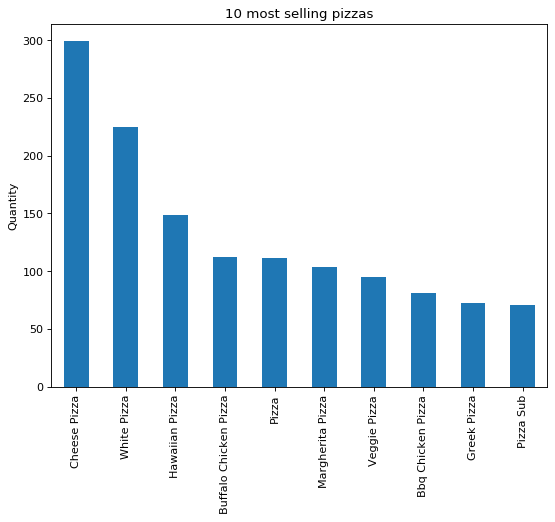

In [61]:
pizza_type = data2['menus_name'].value_counts() 
print(pizza_type.head(10))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pizza_type[:10].plot.bar()
plt.title('10 most selling pizzas')
plt.ylabel('Quantity')      
plt.show()

In [26]:
data_Mname = data2.groupby(data2['menus_name'])[['menus_amountMax']].sum().reset_index().sort_values('menus_amountMax',ascending = False).head(30)
data_Mname['Percentage'] = 100 * data_Mname['menus_amountMax']  / data_Mname['menus_amountMax'].sum()
data_Mname

,menus_name,menus_amountMax,Percentage
4628,White Pizza,3251.35,10.325607
1106,Cheese Pizza,3119.36,9.906435
4188,Taco Pizza,2419.96,7.685287
1943,Hawaiian Pizza,2206.61,7.007732
960,Buffalo Chicken Pizza,1784.50,5.667199
2416,Margherita Pizza,1552.99,4.931971
4565,Veggie Pizza,1472.10,4.675082
3052,Pizza,1460.53,4.638338
814,Bbq Chicken Pizza,1224.85,3.889867
3769,Sicilian Pizza,1170.83,3.718311


In [27]:
data_Mname = data2.groupby(data2['menus_name'])[['menus_amountMin']].sum().reset_index().sort_values('menus_amountMin',ascending = False).tail(30)
data_Mname

,menus_name,menus_amountMin
3402,Pizza Toppings to Cheese from,0.99
3465,Pizza2,0.90
3363,Pizza Split Charge,0.75
1913,Half Pizza Items,0.70
2090,Junior Pizza,0.69
3177,Pizza Dipping Sauce Cup,0.59
600,Add'l Toppings for Personal Pizza,0.50
3131,Pizza By The Slice Extra Topping,0.50
1439,Cup of Pizza Sauce 2 oz,0.50
3224,Pizza Insurance,0.50


In [73]:
data_city = data2.groupby(data2['city'])[['menus_amountMin']].sum().reset_index().sort_values('menus_amountMin',ascending = False).head(20)
data_city['Freq'] = data2['city'].map(data2.groupby('city').size())
data_city['Percentage'] = 100 * data_city['menus_amountMin']  / data_city['menus_amountMin'].sum()
data_city

,city,menus_amountMin,Freq,Percentage
622,New York,10819.18,13,23.917687
116,Brooklyn,7217.26,16,15.955014
513,Los Angeles,4919.95,22,10.876409
122,Buffalo,2171.06,16,4.799507
855,Seattle,2164.95,74,4.786000
164,Chicago,1891.45,8,4.181381
302,Flushing,1870.15,7,4.134293
823,San Francisco,1846.85,124,4.082784
714,Philadelphia,1346.22,64,2.976054
115,Bronx,1296.49,16,2.866118


New York         655
Brooklyn         460
Los Angeles      193
Buffalo          178
Philadelphia     140
Seattle          135
Chicago          133
Flushing         124
San Francisco    110
Bronx             88
Name: city, dtype: int64


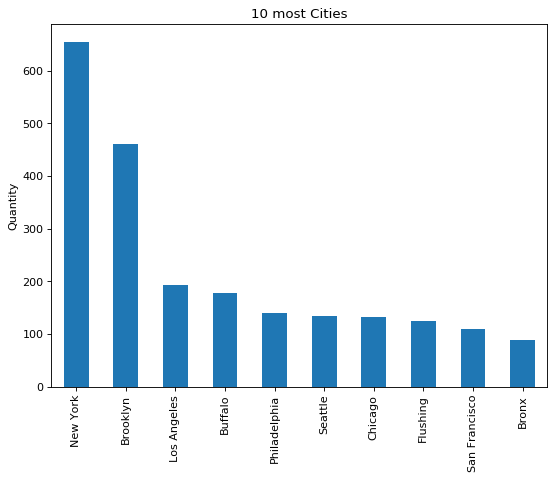

In [68]:
pizza_city = data2['city'].value_counts() 
print(pizza_city.head(10))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pizza_city[:10].plot.bar()
plt.title('10 most Cities')
plt.ylabel('Quantity')      
plt.show()

In [66]:
print (data2[data2['city'] == 'New York'])

                        id dateUpdated                       address  \
27    AVwdK3hX_7pvs4fz2-s0  2019-05-01                 1477 York Ave   
28    AVwdK3hX_7pvs4fz2-s0  2019-05-01                 1477 York Ave   
29    AVwdK3hX_7pvs4fz2-s0  2019-05-01                 1477 York Ave   
30    AVwdK3hX_7pvs4fz2-s0  2019-05-01                 1477 York Ave   
31    AVwdK3hX_7pvs4fz2-s0  2019-05-01                 1477 York Ave   
...                    ...         ...                           ...   
9965  AVwc9HUHIN2L1WUfqtLH  2018-01-14            1133 Lexington Ave   
9966  AVwc9HUHIN2L1WUfqtLH  2018-01-14            1133 Lexington Ave   
9967  AVwc9HUHIN2L1WUfqtLH  2018-01-14            1133 Lexington Ave   
9968  AVwdCYzwkufWRAb51pKD  2018-01-11                  1488 1st Ave   
9969  AVzA12tULD2H7whiWFqO  2018-01-11  2649 Frederick Douglass Blvd   

                                             categories  \
27    Restaurant,Pizza Place Upper East Side,Pizza P...   
28    Restaurant,

In [75]:
data2['province'].map(data2.groupby('province').size())

0         40
1        288
2        324
3        366
4        118
        ... 
9995    2640
9996    2640
9997     381
9998     381
9999     149
Name: province, Length: 10000, dtype: int64

In [74]:
data_state = data2.groupby(data2['province'])[['menus_amountMin']].sum().reset_index().sort_values('menus_amountMin',ascending = False).head(10)
data_state['Percentage'] = 100 * data_state['menus_amountMin']  / data_state['menus_amountMin'].sum()
data_state['Freq'] = data2['province'].map(data2.groupby('province').size())
data_state

,province,menus_amountMin,Percentage,Freq
30,NY,39960.83,38.309965,2640
4,CA,22442.85,21.515689,118
34,PA,8917.59,8.549186,2640
8,FL,7687.07,7.369501,601
38,TX,5943.59,5.698048,2640
13,IL,5025.21,4.817608,366
41,WA,3834.23,3.675830,601
3,AZ,3630.56,3.480574,366
31,OH,3492.93,3.348630,2640
19,MI,3374.37,3.234968,814


NY    2640
CA    1386
PA     814
FL     601
TX     485
IL     381
MI     366
OH     324
AZ     288
WA     262
Name: province, dtype: int64


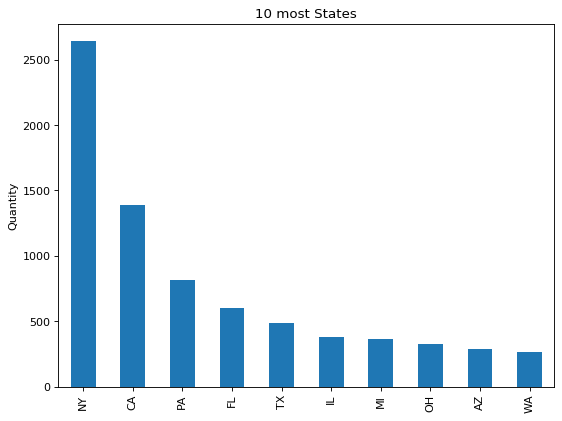

In [69]:
pizza_state = data2['province'].value_counts() 
print(pizza_state.head(10))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pizza_state[:10].plot.bar()
plt.title('10 most States')
plt.ylabel('Quantity')      
plt.show()

In [140]:
data_Pcode = data2.groupby(data2['postalCode'])[['menus_amountMin']].sum().reset_index().sort_values('menus_amountMin',ascending = False).head(10)
data_Pcode

,postalCode,menus_amountMin
1491,90028,2252.84
1498,90049,1808.07
14,10016,1583.54
123,11367,1276.00
100,11215,1106.50
1740,98109,1073.19
1485,89509,1064.45
2,10001,987.91
7,10007,973.60
1658,94619,858.87


In [141]:
print(data2.loc[data2['postalCode'] == '90028', 'city'])
print(data2.loc[data2['postalCode'] == '90049', 'city'])
print(data2.loc[data2['postalCode'] == '10016', 'city'])
print(data2.loc[data2['postalCode'] == '11367', 'city'])

3255    Los Angeles
3256    Los Angeles
3257    Los Angeles
3258    Los Angeles
3259    Los Angeles
           ...     
3360    Los Angeles
3361    Los Angeles
9043    Los Angeles
9044    Los Angeles
9045    Los Angeles
Name: city, Length: 65, dtype: object
4770    Los Angeles
4771    Los Angeles
4772    Los Angeles
4773    Los Angeles
4774    Los Angeles
           ...     
4858    Los Angeles
4859    Los Angeles
4860    Los Angeles
4861    Los Angeles
4862    Los Angeles
Name: city, Length: 67, dtype: object
1030    New York
1031    New York
1032    New York
1033    New York
1034    New York
          ...   
5587    New York
5588    New York
5589    New York
9799    New York
9819    New York
Name: city, Length: 102, dtype: object
5303    Flushing
5304    Flushing
5305    Flushing
5306    Flushing
5307    Flushing
          ...   
6491    Flushing
6492    Flushing
6493    Flushing
6494    Flushing
6495    Flushing
Name: city, Length: 92, dtype: object


In [144]:
data_cat = data2.groupby(data2['categories'])[['menus_amountMin']].sum().reset_index().sort_values('menus_amountMin',ascending = False).head(20)
data_cat

,categories,menus_amountMin
389,"Restaurant,Pizza Place",36179.05
55,Pizza Place,28697.55
351,"Pizza,Restaurant,Pizza Place,Restaurants",4836.61
326,"Pizza,Restaurant,Pizza Place",4333.61
30,"Italian Restaurant,Pizza Place",3969.59
436,"Restaurant,Pizza Place,Restaurants",3674.09
315,"Pizza,Restaurant,Italian,Pizza Place",3327.44
296,"Pizza,Restaurant,Chain Restaurant,Pizza Place,...",2125.29
182,"Pizza Place,Restaurants",2055.43
164,"Pizza Place,Restaurant",1777.91


In [62]:
pizza_categories = data2['categories'].value_counts() 
print(pizza_categories.head(10))

Restaurant,Pizza Place                                               2690
Pizza Place                                                          2209
Pizza,Restaurant,Pizza Place,Restaurants                              370
Italian Restaurant,Pizza Place                                        312
Restaurant,Pizza Place,Restaurants                                    293
Pizza,Restaurant,Pizza Place                                          263
Pizza,Restaurant,Italian,Pizza Place                                  198
Pizza Place,Restaurants                                               162
Pizza Place,Restaurant                                                132
Italian Restaurant,Pizza Place,Italian Restaurant and Pizza Place     113
Name: categories, dtype: int64


In [66]:
import plotly.offline as py

In [70]:
data_loc = data2[data2['categories']=='Restaurant,Pizza Place']

data_map = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = data_loc['longitude'],
        lat = data_loc['latitude'],
        text = data_loc['city'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.6,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )))]

layout = dict(
        title = 'Restaurant,Pizza Place Locations',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa'),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5))

py.init_notebook_mode(connected=True)
fig = dict( data=data_map, layout=layout )
py.iplot(fig, filename='pizza_restaurant.html')

In [71]:
data_loc1 = data2[data2['categories']=='Pizza Place']

data_map1 = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = data_loc1['longitude'],
        lat = data_loc1['latitude'],
        text = data_loc1['city'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.6,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )))]

layout = dict(
        title = 'Pizza Place Locations',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa'),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5))

py.init_notebook_mode(connected=True)
fig = dict( data=data_map1, layout=layout )
py.iplot(fig, filename='pizza_place.html')

In [145]:
data_Pcat = data2.groupby(data2['primaryCategories'])[['menus_amountMin']].sum().reset_index().sort_values('menus_amountMin',ascending = False).head(20)
data_Pcat

,primaryCategories,menus_amountMin
0,Accommodation & Food Services,133063.92
3,Management of Companies & Enterprises,430.73
1,"Accommodation & Food Services,Management of Co...",330.65
5,"Retail,Accommodation & Food Services",142.09
4,Retail,129.85
6,"Wholesale Trade,Accommodation & Food Services",33.78
2,"Educational Services,Accommodation & Food Serv...",29.00
7,"Wholesale Trade,Accommodation & Food Services,...",9.00


In [7]:
Total_min = data2['menus_amountMin'].sum()
Total_max = data2['menus_amountMax'].sum()
print(Total_min)
print(Total_max)

134169.02000000002
140326.7


In [60]:
data_Mul1 = data2.groupby(['province','city','name','categories','primaryCategories'])[['menus_amountMin']].sum().reset_index().sort_values('menus_amountMin',ascending = False).head(20)
data_Mul1['Percent'] = (100 * data_Mul1['menus_amountMin'])/  Total_min
data_Mul1

,province,city,name,categories,primaryCategories,menus_amountMin,Percent
178,CA,Los Angeles,California Pizza Kitchen,"Pizza,Restaurant,Chain Restaurant,Pizza Place,...",Accommodation & Food Services,1998.76,1.489733
179,CA,Los Angeles,California Pizza Kitchen,"Restaurant,Pizza Place",Accommodation & Food Services,1535.97,1.144802
1160,NV,Reno,Pirates Pizza,"Restaurant,Pizza Place",Accommodation & Food Services,1064.45,0.793365
2202,WA,Seattle,Olympia Pizza and Spaghetti House,"Pizza Place East Queen Anne,Pizza Place,Restau...",Accommodation & Food Services,989.40,0.737428
1452,NY,New York,New York Pizza Suprema,"Pizza,Restaurant,Pizza Place",Accommodation & Food Services,987.91,0.736318
1320,NY,Flushing,Gino's Pizzeria,"Restaurant,Pizza Place",Accommodation & Food Services,949.65,0.707801
1443,NY,New York,Little Italy Gourmet Pizza,"Pizza,Restaurant,Italian,Pizza Place",Accommodation & Food Services,817.20,0.609082
169,CA,Lakewood,California Pizza Kitchen,"Pizza,Restaurant,Italian,Pizza Place,Salad,Cal...",Accommodation & Food Services,771.25,0.574835
320,CA,Thousand Oaks,California Pizza Kitchen,"Restaurant,Pizza Place",Accommodation & Food Services,769.05,0.573195
1474,NY,New York,Royal Pizza,"Pizza,Restaurant,Italian,Pizza Place",Accommodation & Food Services,685.75,0.511109


In [61]:
data_Mul2 = data2.groupby(['province','city','name','categories','primaryCategories'])[['menus_amountMax']].sum().reset_index().sort_values('menus_amountMax',ascending = False).head(20)
data_Mul2['Percent'] = (100 * data_Mul2['menus_amountMax'])/  Total_max
data_Mul2

,province,city,name,categories,primaryCategories,menus_amountMax,Percent
178,CA,Los Angeles,California Pizza Kitchen,"Pizza,Restaurant,Chain Restaurant,Pizza Place,...",Accommodation & Food Services,1998.76,1.424362
179,CA,Los Angeles,California Pizza Kitchen,"Restaurant,Pizza Place",Accommodation & Food Services,1535.97,1.094567
2188,WA,Pasco,Rocco's,Pizza Place,Accommodation & Food Services,1448.81,1.032455
1160,NV,Reno,Pirates Pizza,"Restaurant,Pizza Place",Accommodation & Food Services,1064.45,0.758551
2202,WA,Seattle,Olympia Pizza and Spaghetti House,"Pizza Place East Queen Anne,Pizza Place,Restau...",Accommodation & Food Services,989.40,0.705069
1452,NY,New York,New York Pizza Suprema,"Pizza,Restaurant,Pizza Place",Accommodation & Food Services,987.91,0.704007
1320,NY,Flushing,Gino's Pizzeria,"Restaurant,Pizza Place",Accommodation & Food Services,949.65,0.676742
1443,NY,New York,Little Italy Gourmet Pizza,"Pizza,Restaurant,Italian,Pizza Place",Accommodation & Food Services,817.20,0.582355
169,CA,Lakewood,California Pizza Kitchen,"Pizza,Restaurant,Italian,Pizza Place,Salad,Cal...",Accommodation & Food Services,771.25,0.549610
320,CA,Thousand Oaks,California Pizza Kitchen,"Restaurant,Pizza Place",Accommodation & Food Services,769.05,0.548043


In [142]:
data_date  = data2.groupby(data2['dateUpdated'].dt.strftime('%Y,%B'))['menus_amountMin'].sum().sort_values().reset_index()
data_date

,dateUpdated,menus_amountMin
0,"2018,August",16.00
1,"2018,November",134.27
2,"2019,May",518.47
3,"2019,February",1196.55
4,"2018,September",1321.78
5,"2018,February",2164.33
6,"2018,December",3284.91
7,"2019,January",3326.68
8,"2018,April",6804.06
9,"2018,March",7357.14


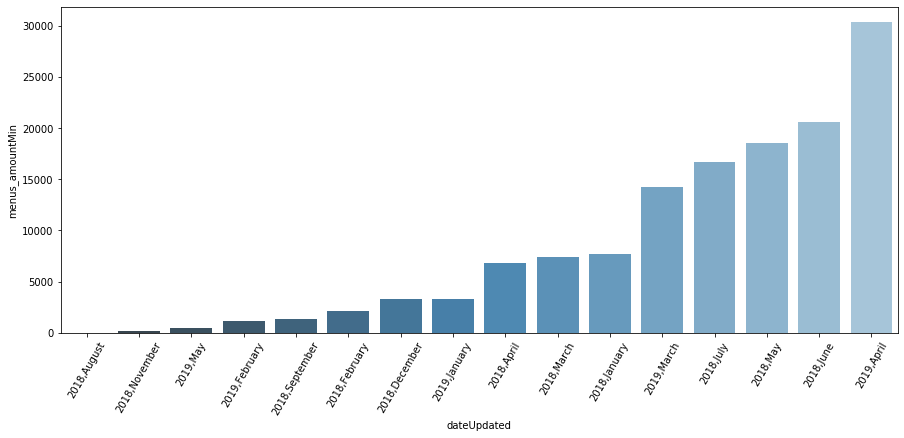

In [143]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=60)
ax = sns.barplot("dateUpdated", y="menus_amountMin", data=data_date, palette="Blues_d")

In [32]:
data_date  = data2.groupby(data2['dateUpdated'].dt.strftime('%Y,%B'))['menus_amountMax'].sum().sort_values().reset_index()
data_date

,dateUpdated,menus_amountMax
0,"2018,August",16.00
1,"2018,November",144.27
2,"2019,May",518.47
3,"2019,February",1226.35
4,"2018,September",1378.07
5,"2019,January",3443.88
6,"2018,December",3529.09
7,"2018,February",3659.08
8,"2018,April",7151.65
9,"2018,March",7827.25


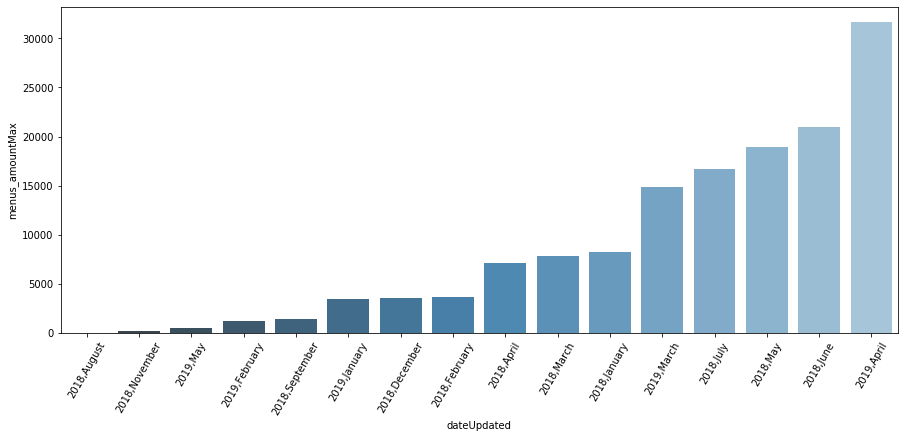

In [33]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=60)
ax = sns.barplot("dateUpdated", y="menus_amountMax", data=data_date, palette="Blues_d")

In [16]:
data_week = data2[["dateUpdated","menus_amountMax"]]
data_week = data_week.sort_values(by='dateUpdated')
data_week.head()

,dateUpdated,menus_amountMax
9999,2018-01-04,8.79
9998,2018-01-07,8.45
9997,2018-01-07,8.45
9996,2018-01-08,10.10
9986,2018-01-08,27.10


In [39]:
data_month1 = data_week.groupby([pd.Grouper(key='dateUpdated', freq='M')])['menus_amountMax'].sum().reset_index().sort_values('dateUpdated')
data_month1.head()

,dateUpdated,menus_amountMax
0,2018-01-31,8283.15
1,2018-02-28,3659.08
2,2018-03-31,7827.25
3,2018-04-30,7151.65
4,2018-05-31,18982.42


In [40]:
import plotly.express as px
fig = px.line(data_month1, x='dateUpdated', y='menus_amountMax')
fig.show()

In [46]:
data_week2 = data_week.groupby([pd.Grouper(key='dateUpdated', freq='W')])['menus_amountMax'].sum().reset_index().sort_values('dateUpdated')
data_week2.head(10)

,dateUpdated,menus_amountMax
0,2018-01-07,25.69
1,2018-01-14,563.20
2,2018-01-21,51.99
3,2018-01-28,2543.01
4,2018-02-04,8092.16
5,2018-02-11,415.59
6,2018-02-18,0.00
7,2018-02-25,53.03
8,2018-03-04,197.56
9,2018-03-11,6069.12


In [42]:
import plotly.express as px
fig = px.line(data_week2, x='dateUpdated', y='menus_amountMax')
fig.show()

In [43]:
data_week1 = data_week.groupby([pd.Grouper(key='dateUpdated', freq='W-MON')])['menus_amountMax'].sum().reset_index().sort_values('dateUpdated')
data_week1.head()

,dateUpdated,menus_amountMax
0,2018-01-08,273.69
1,2018-01-15,315.20
2,2018-01-22,90.48
3,2018-01-29,4158.69
4,2018-02-05,6684.99


In [45]:
import plotly.express as px
fig = px.line(data_week1, x='dateUpdated', y='menus_amountMax')
fig.show()

In [37]:
data_day1 = data_week.groupby([pd.Grouper(key='dateUpdated', freq='D')])['menus_amountMax'].sum().reset_index().sort_values('dateUpdated')
data_day1.head()

,dateUpdated,menus_amountMax
0,2018-01-04,8.79
1,2018-01-05,0.00
2,2018-01-06,0.00
3,2018-01-07,16.90
4,2018-01-08,248.00


In [38]:
import plotly.express as px
fig = px.line(data_day1, x='dateUpdated', y='menus_amountMax')
fig.show()

In [47]:
from datetime import date
import holidays

In [54]:
for ptr in holidays.US(years = 2018).items(): 
    print(ptr)

(datetime.date(2018, 1, 1), "New Year's Day")
(datetime.date(2018, 1, 15), 'Martin Luther King, Jr. Day')
(datetime.date(2018, 2, 19), "Washington's Birthday")
(datetime.date(2018, 5, 28), 'Memorial Day')
(datetime.date(2018, 7, 4), 'Independence Day')
(datetime.date(2018, 9, 3), 'Labor Day')
(datetime.date(2018, 10, 8), 'Columbus Day')
(datetime.date(2018, 11, 11), 'Veterans Day')
(datetime.date(2018, 11, 12), 'Veterans Day (Observed)')
(datetime.date(2018, 11, 22), 'Thanksgiving')
(datetime.date(2018, 12, 25), 'Christmas Day')


In [55]:
for ptr in holidays.US(years = 2019).items(): 
    print(ptr)

(datetime.date(2019, 1, 1), "New Year's Day")
(datetime.date(2019, 1, 21), 'Martin Luther King, Jr. Day')
(datetime.date(2019, 2, 18), "Washington's Birthday")
(datetime.date(2019, 5, 27), 'Memorial Day')
(datetime.date(2019, 7, 4), 'Independence Day')
(datetime.date(2019, 9, 2), 'Labor Day')
(datetime.date(2019, 10, 14), 'Columbus Day')
(datetime.date(2019, 11, 11), 'Veterans Day')
(datetime.date(2019, 11, 28), 'Thanksgiving')
(datetime.date(2019, 12, 25), 'Christmas Day')
